# Car Price Prediction with Linear Regression

### Author: Eren ERİŞ

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats #İstatistik Kütüphanesi
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [64]:
df = pd.read_excel('cars.xls') 

### EDA- Exploratory Data Analysis

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.info()#Variable Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [5]:
df.isnull().sum() # Total Number of Null Values in Columns

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df.describe() #statistical data

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
df.corr(numeric_only=True) #Correlation Data

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


### Data Visualization 

In [9]:
df['Make'].unique() 

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [10]:
df['Make'].value_counts(normalize=True)

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

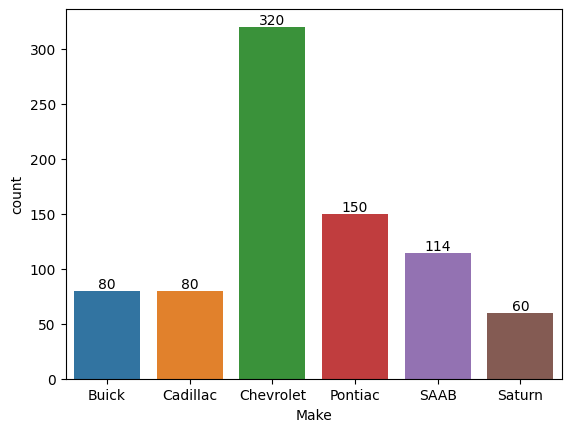

In [14]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

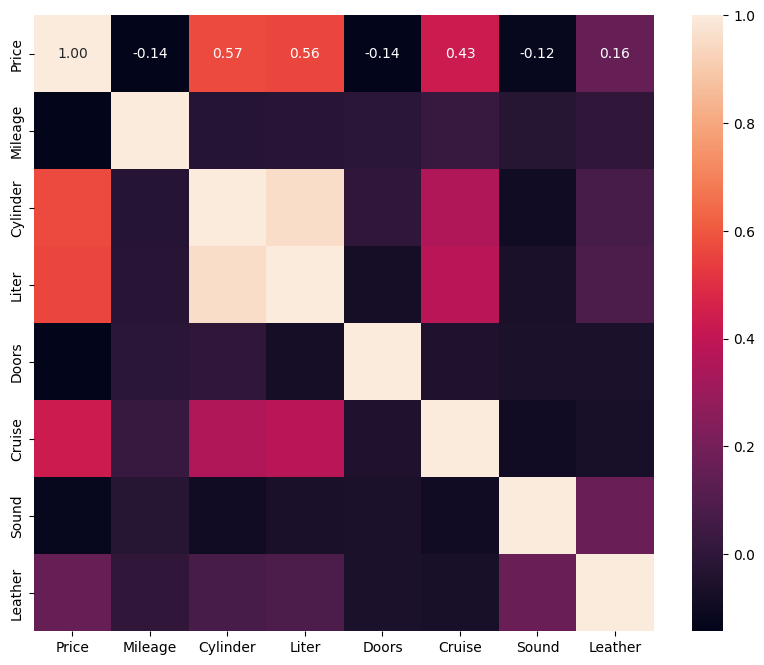

In [19]:
plt.figure(figsize=(10, 8))  # Örnek olarak 10x8 boyutunda bir plot
sns.heatmap(df.corr(numeric_only=True), annot=True ,  fmt='.2f')
plt.show()

In [ ]:
#Regresyon Kural 1
#Korelasyon - Korelasyonu 0,20'nin üzerinde ve 0,90'ın altında olan bir alan kullanacağız
#0.20'nin katkısı çok düşük
#0,90'ın üzerindeki veriler farklı bir biçimde kendini tekrarladı

In [20]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [22]:
stats.ttest_ind(df['Mileage'],df['Price']),
stats.ttest_ind(df['Cylinder'],df['Price'])

TtestResult(statistic=-61.20811184531169, pvalue=0.0, df=1606.0)

### Data Preparation

In [27]:
x = df[['Cylinder','Liter','Cruise','Mileage']]
y = df[['Price']]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
x_train,y_train

(     Cylinder  Liter  Cruise  Mileage
 344         8    6.0       1    20000
 350         8    6.0       1     7054
 443         6    3.5       0    15903
 331         4    2.2       1     6709
 290         4    2.2       0    13776
 ..        ...    ...     ...      ...
 71          6    3.8       1     9795
 106         8    4.6       1    24415
 270         4    2.2       0     4922
 435         6    3.5       0    18721
 102         8    4.6       1    16041
 
 [643 rows x 4 columns],
             Price
 344  41371.379273
 350  39875.854255
 443  17162.478255
 331  14696.028990
 290  14023.938547
 ..            ...
 71   26060.335350
 106  35866.582709
 270  14061.122765
 435  17173.942322
 102  39307.009165
 
 [643 rows x 1 columns])

In [30]:
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predict=model.predict(x_test)

In [32]:
r2_score(predict,y_test)  

-0.36712605712132085

In [33]:
# This value is very low because there is no brand and vehicle type in the training data. 
# These values affect the price considerably. What we need to do is to educate them too.

In [34]:
x1 = df[['Cylinder','Liter','Cruise','Mileage','Make','Trim']]
y1 = df[['Price']]

In [35]:
"""
We have the problem of organizing the data. Since brand and type are string expressions, we must translate them. 
What we need to patch here is if we turn these into discrete data, we can perform more accurate data analysis.
"""

'\nWe have the problem of organizing the data. Since brand and type are string expressions, we must translate them. \nWhat we need to patch here is if we turn these into discrete data, we can perform more accurate data analysis.\n'

In [38]:
x1=pd.get_dummies(x1,drop_first=True)
x1

,Cylinder,Liter,Cruise,Mileage,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,6,3.1,1,8221,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,3.1,1,9135,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,6,3.1,1,13196,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,6,3.1,1,16342,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,6,3.1,1,19832,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6,3.0,1,16229,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
800,6,3.0,1,19095,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
801,6,3.0,1,20484,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
802,6,3.0,1,25979,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [47]:
lr = LinearRegression()
model2=lr.fit(x1_train,y1_train)
predict2=model2.predict(x1_test)

In [48]:
r2_score(predict2,y1_test)  # Education was completed with high success

0.9717252793477565

In [56]:
#Tested with 2 different models for verification

In [50]:
R=Ridge()
R.fit(x1_train,y1_train)
predict3=R.predict(x1_test)

In [51]:
r2_score(predict3,y1_test)

0.9684687553754919

In [54]:
L=Lasso()
L.fit(x1_train,y1_train)
predict4=L.predict(x1_test)

In [55]:
r2_score(predict4,y1_test)

0.9712426639271194

In [ ]:
#Error amount calculation was made

In [57]:
mean_squared_error(predict,y_test)**.5  

7413.255792158797

In [58]:
mean_squared_error(predict2,y1_test)**.5

1523.6314728737627

In [59]:
mean_squared_error(predict3,y1_test)**.5

1575.6786242840112

In [60]:
mean_squared_error(predict4,y1_test)**.5

1527.0417304803855